In [3]:
import pandas as pd

## Initial exploration

In [19]:
# Specify the range of columns to read by indices
start_column_idx = 2399
end_column_idx = 2528

# Specify the first column index
first_column_idx = 0

# Read the CSV file with the specified range of columns
df = pd.read_csv('data/mm23.csv', usecols=[first_column_idx] + list(range(start_column_idx, end_column_idx )))

# Now df contains the data from the CSV file within the specified column range, including the first column

/var/folders/vt/5wzq72vd2mj_qqq_fwp77h_40000gq/T/ipykernel_24835/774047372.py:11: DtypeWarning: Columns (2399,2400,2401,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/mm23.csv', usecols=[first_column_idx] + list(range(start_column_idx, end_column_idx )))


In [21]:
# delete rows 0 to 1119
df = df.iloc[1119:] 

In [18]:
df.columns

Index(['Title', 'CPI INDEX: NON - PRIVATE RENTALS FOR HOUSING 2015=100',
       'CPI INDEX: REGISTERED SOCIAL LANDLORD RENTALS FOR HOUSING 2015=100',
       'CPI INDEX: LOCAL AUTHORITY RENTALS FOR HOUSING 2015=100',
       'CPI WEIGHTS: PRIVATE RENTALS FOR HOUSING',
       'CPI WEIGHTS: NON - PRIVATE RENTALS FOR HOUSING',
       'CPI WEIGHTS: REGISTERED SOCIAL LANDLORD RENTALS FOR HOUSING',
       'CPI WEIGHTS: LOCAL AUTHORITY RENTALS FOR HOUSING',
       'CPIH INDEX 00: ALL ITEMS 2015=100',
       'CPIH INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100',
       ...
       'CPIH INDEX 12.3.2 : OTHER PERSONAL EFFECTS 2015=100',
       'CPIH INDEX 12.4 : SOCIAL PROTECTION 2015=100',
       'CPIH INDEX 12.5 : INSURANCE 2015=100',
       'CPIH INDEX 12.5.2 : House contents insurance 2015=100',
       'CPIH INDEX 12.5.3/5 : Health insurance and other insurance 2015=100',
       'CPIH INDEX 12.5.4 : Transport insurance 2015=100',
       'CPIH INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=10

In [26]:
# parse data of the column Title to date format, nowing that the format is %YYYY-%MMM, ex: 2019 JAN
df['Title'] = pd.to_datetime(df['Title'], format=r'%Y %b')

In [28]:
# melt the dataframe to have the columns as rows
df_melted = df.melt(id_vars=['Title'], var_name='Index', value_name='Value')

In [31]:
df_melted.to_excel('data/processed_CPI.xlsx', index=False)

## Second iteration

### Useful CPIHs

In [168]:
full_df = pd.read_csv('data/mm23.csv')

/var/folders/vt/5wzq72vd2mj_qqq_fwp77h_40000gq/T/ipykernel_24835/135721755.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

In [169]:
# find in full_df all the columns that are structured as CPIH INDEX \d{2}\s
cpih_cols = full_df.columns[full_df.columns.str.contains('CPIH INDEX \d{2}\s?\:')]
print(cpih_cols)
# add Title to the cpih_cols
cpih_cols = ['Title'] + list(cpih_cols)

Index(['CPIH INDEX 00: ALL ITEMS 2015=100',
       'CPIH INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100',
       'CPIH INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100',
       'CPIH INDEX 03 : CLOTHING AND FOOTWEAR 2015=100',
       'CPIH INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100',
       'CPIH INDEX 06 : HEALTH 2015=100', 'CPIH INDEX 07 : TRANSPORT2015=100',
       'CPIH INDEX 08 : COMMUNICATION 2015=100',
       'CPIH INDEX 09 : RECREATION & CULTURE 2015=100',
       'CPIH INDEX 10 : EDUCATION 2015=100',
       'CPIH INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100',
       'CPIH INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100',
       'CPIH INDEX 04: Housing, water, electricity, gas and other fuels 2015=100'],
      dtype='object')


In [170]:
cpih = full_df[cpih_cols].dropna().iloc[4:]
cpih.head()

,Title,CPIH INDEX 00: ALL ITEMS 2015=100,CPIH INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100,"CPIH INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100",CPIH INDEX 03 : CLOTHING AND FOOTWEAR 2015=100,"CPIH INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100",CPIH INDEX 06 : HEALTH 2015=100,CPIH INDEX 07 : TRANSPORT2015=100,CPIH INDEX 08 : COMMUNICATION 2015=100,CPIH INDEX 09 : RECREATION & CULTURE 2015=100,CPIH INDEX 10 : EDUCATION 2015=100,"CPIH INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100",CPIH INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100,"CPIH INDEX 04: Housing, water, electricity, gas and other fuels 2015=100"
194,1988,48.2,48.6,27.8,197.4,70.0,38.7,41.5,97.2,74.9,12.6,33.9,47.0,40.2
195,1989,51.0,51.4,28.8,206.0,72.5,41.8,43.7,98.7,77.7,13.5,35.9,50.1,43.2
196,1990,55.1,55.5,30.9,213.6,75.8,45.4,46.5,104.2,81.7,14.8,39.3,52.9,47.9
197,1991,59.2,58.4,34.9,217.1,80.2,49.9,49.8,113.0,86.8,16.6,43.7,56.4,51.8
198,1992,61.9,59.7,38.0,214.4,82.0,53.3,52.4,116.1,89.7,18.8,46.6,59.2,54.7


In [ ]:
#replace Title with Date
cpih = cpih.rename(columns={'Title': 'Date'})
#only use the dates that have the format %Y %b
cpih=cpih[cpih['Date'].str.contains(r'\d{4}\s\w{3}')]
# parse data of the column Date to date format, nowing that the format is %YYYY-%MMM, ex: 2019 JAN
cpih['Date'] = pd.to_datetime(cpih['Date'], format=r'%Y %b')
# change data type of all columns but date to be a float
cpih.iloc[:,1:] = cpih.iloc[:,1:].astype(float)

In [175]:
# format header to include inly the category name. This mean keeping the first group 'CPIH INDEX \d{2}\s?\:(.*)2015=100' and strip
# the rest of the string
cpih.columns = cpih.columns.str.replace('CPIH INDEX (\d{2})\s?\:(.*)2015=100', r'\1.\2', regex=True).str.strip().str.upper()

In [176]:
cpih.to_excel('data/processed_CPIH.xlsx', index=False)

In [212]:
#melted cpih
cpih_melted = cpih.melt(id_vars=['DATE'], var_name='Category', value_name='CPIH (2015)')

In [213]:
cpih_melted.to_excel('data/CPIH_melted.xlsx', index=False)

### Find all 01 values for example

In [193]:
# find in full_df all the columns that are structured as CPIH INDEX \d{2}\s
cpih_01_cols = full_df.columns[full_df.columns.str.contains('CPIH INDEX 01')]
cpih_01_cols

Index(['CPIH INDEX 01.1.1.1 Rice 2015=100',
       'CPIH INDEX 01.1.1.2 Flours and other cereals 2015=100',
       'CPIH INDEX 01.1.1.3 Bread 2015=100',
       'CPIH INDEX 01.1.1.4 Other bakery products 2015=100',
       'CPIH INDEX 01.1.1.5 Pizza and quiche 2015=100',
       'CPIH INDEX 01.1.1.6 Pasta products and couscous 2015=100',
       'CPIH INDEX 01.1.1.7/8 Breakfast cereals and other cereal products 2015=100',
       'CPIH INDEX 01.1.2.1 Beef and veal 2015=100',
       'CPIH INDEX 01.1.2.2 Pork 2015=100',
       'CPIH INDEX 01.1.2.3 Lamb and goat 2015=100',
       'CPIH INDEX 01.1.2.4 Poultry 2015=100',
       'CPIH INDEX 01.1.2.6 Edible offal 2015=100',
       'CPIH INDEX 01.1.2.7 Dried, salted or smoked meat 2015=100',
       'CPIH INDEX 01.1.2.8 Other meat preparations 2015=100',
       'CPIH INDEX 01.1.3.1 Fresh or chilled fish 2015=100',
       'CPIH INDEX 01.1.3.4 Frozen seafood 2015=100',
       'CPIH INDEX 01.1.3.6 Other preserved or processed fish and seafood based pre

In [194]:
cpih_01_cols = ['Title'] + list(cpih_01_cols)

In [195]:
cpih_01 = full_df[cpih_01_cols].iloc[5:]

In [196]:
# dropna only if all the row (except title) are nan
cpih_01 = cpih_01.dropna(how='all', subset=cpih_01.columns[1:])

In [199]:
#replace Title with Date
cpih_01 = cpih_01.rename(columns={'Title': 'Date'})
#only use the dates that have the format %Y %b
cpih_01=cpih_01[cpih_01['Date'].str.contains(r'\d{4}\s\w{3}')]
# parse data of the column Date to date format, nowing that the format is %YYYY-%MMM, ex: 2019 JAN
cpih_01['Date'] = pd.to_datetime(cpih_01['Date'], format=r'%Y %b')
# change data type of all columns but date to be a float
cpih_01.iloc[:,1:] = cpih_01.iloc[:,1:].astype(float)

In [203]:
cpih_01.columns

Index(['Date', 'CPIH INDEX 01.1.1.1 Rice 2015=100',
       'CPIH INDEX 01.1.1.2 Flours and other cereals 2015=100',
       'CPIH INDEX 01.1.1.3 Bread 2015=100',
       'CPIH INDEX 01.1.1.4 Other bakery products 2015=100',
       'CPIH INDEX 01.1.1.5 Pizza and quiche 2015=100',
       'CPIH INDEX 01.1.1.6 Pasta products and couscous 2015=100',
       'CPIH INDEX 01.1.1.7/8 Breakfast cereals and other cereal products 2015=100',
       'CPIH INDEX 01.1.2.1 Beef and veal 2015=100',
       'CPIH INDEX 01.1.2.2 Pork 2015=100',
       'CPIH INDEX 01.1.2.3 Lamb and goat 2015=100',
       'CPIH INDEX 01.1.2.4 Poultry 2015=100',
       'CPIH INDEX 01.1.2.6 Edible offal 2015=100',
       'CPIH INDEX 01.1.2.7 Dried, salted or smoked meat 2015=100',
       'CPIH INDEX 01.1.2.8 Other meat preparations 2015=100',
       'CPIH INDEX 01.1.3.1 Fresh or chilled fish 2015=100',
       'CPIH INDEX 01.1.3.4 Frozen seafood 2015=100',
       'CPIH INDEX 01.1.3.6 Other preserved or processed fish and seafood b

In [205]:
cpih_01.columns = cpih_01.columns.str.replace('CPIH INDEX(.*)2015=100', r'\1', regex=True).str.strip().str.upper()

In [208]:
cpih_01

,DATE,01.1.1.1 RICE,01.1.1.2 FLOURS AND OTHER CEREALS,01.1.1.3 BREAD,01.1.1.4 OTHER BAKERY PRODUCTS,01.1.1.5 PIZZA AND QUICHE,01.1.1.6 PASTA PRODUCTS AND COUSCOUS,01.1.1.7/8 BREAKFAST CEREALS AND OTHER CEREAL PRODUCTS,01.1.2.1 BEEF AND VEAL,01.1.2.2 PORK,...,01.1.3 : FISH,"01.1.4 : MILK, CHEESE & EGGS",01.1.5 : OILS & FATS,01.1.6 : FRUIT,01.1.7 : VEGETABLES INCLUDING POTATOES AND TUBERS,"01.1.8 :SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY",01.1.9 : FOOD PRODUCTS,01.2 : NON-ALCOHOLIC BEVERAGES,"01.2.1 : COFFEE, TEA, COCOA","01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES"
1018,1988-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.3,48.5,45.5,49.4,53.1,37.7,55.3,45.1,51.3,43.1
1019,1988-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.7,48.5,45.9,50.9,54.7,37.6,55.2,45.5,51.4,43.7
1020,1988-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.1,48.6,46.1,50.7,55.3,37.9,55.1,45.8,51.4,44.1
1021,1988-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.2,48.9,46.2,51.6,55.7,38.0,55.9,46.2,51.5,44.8
1022,1988-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.8,48.8,46.3,51.6,54.8,38.1,56.6,46.8,51.4,45.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,2023-06-01,118.6,103.6,134.0,150.4,125.6,141.0,120.6,120.4,136.2,...,136.8,142.6,168.0,128.5,131.5,127.8,149.2,134.4,126.8,137.2
1444,2023-07-01,118.7,104.3,134.0,151.4,126.3,141.6,119.8,120.9,139.0,...,139.4,142.1,168.5,127.1,131.6,127.9,149.5,134.0,125.0,137.2
1445,2023-08-01,118.2,104.8,133.3,153.1,123.5,143.1,122.5,121.1,139.3,...,135.5,143.7,167.8,127.1,131.0,128.9,150.7,136.0,128.8,138.7
1446,2023-09-01,118.4,106.0,134.3,153.6,127.5,136.3,122.0,121.8,137.8,...,136.4,141.4,168.8,126.6,132.1,128.8,151.1,133.7,126.7,136.3


In [210]:
# melt cpih_01
melted_cpih_01 = cpih_01.melt(id_vars=['DATE'], var_name='Category', value_name='CPIH (2015)')

In [211]:
melted_cpih_01.to_excel('data/melted_CPIH_01.xlsx', index=False)

### Find weights

In [328]:
weights_cols = full_df.columns[full_df.columns.str.contains('CPIH WEIGHTS \d{2}\s?\:')]

In [329]:
weights = full_df[['Title'] + list(weights_cols)]

In [330]:
weights.dropna(inplace=True)
weights=weights.iloc[4:]

/var/folders/vt/5wzq72vd2mj_qqq_fwp77h_40000gq/T/ipykernel_24835/4273657507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights.dropna(inplace=True)


In [331]:
#get all the values of the first row
weights=weights.astype(int)

In [332]:
# replace title with regexp expression 

weights.columns = weights.columns.str.replace('CPIH WEIGHTS (\d{2})\s?\:(.*)', r'\1.\2', regex=True).str.strip().str.upper()

In [333]:
# replace title with year
weights = weights.rename(columns={'TITLE': 'YEAR'})


In [297]:
#make a copy of weights and cpih and change all the titles (except for year and date respectivelt) to by numeric
w= weights.copy()
w.columns = w.columns.str.replace('(\d{2})\.(.*)', r'\1', regex=True).str.strip()

c = cpih.copy()
c.columns = c.columns.str.replace('(\d{2})\.(.*)', r'\1', regex=True).str.strip()

In [300]:
# melt the dataframes
w_melted = w.melt(id_vars=['YEAR'], var_name='Category', value_name='Weight')
c_melted = c.melt(id_vars=['DATE'], var_name='Category', value_name='CPIH (2015)')

In [302]:
#extract the year from the date
c_melted['YEAR'] = c_melted['DATE'].dt.year

# merge the two dataframes
merged = pd.merge(c_melted, w_melted, on=['YEAR', 'Category'])

In [305]:
merged['weighted CPIH'] = merged['CPIH (2015)'] * merged['Weight']/1000

In [308]:
# create independent dataframe for 00 category
merged_00 = merged[merged['Category'].str.contains('00')]

In [317]:
merged_00 = merged_00[['DATE','CPIH (2015)']]

In [309]:
#filter out the 00 category from the merged dataframe
merged = merged[~merged['Category'].str.contains('00')]

In [314]:
merged_n00 = merged.groupby(['DATE']).agg({'weighted CPIH': 'sum'}).reset_index()

In [319]:
#merge the two dataframes using the date as key
diff_df=pd.merge(merged_n00, merged_00, on=['DATE'])


<Axes: xlabel='DATE'>

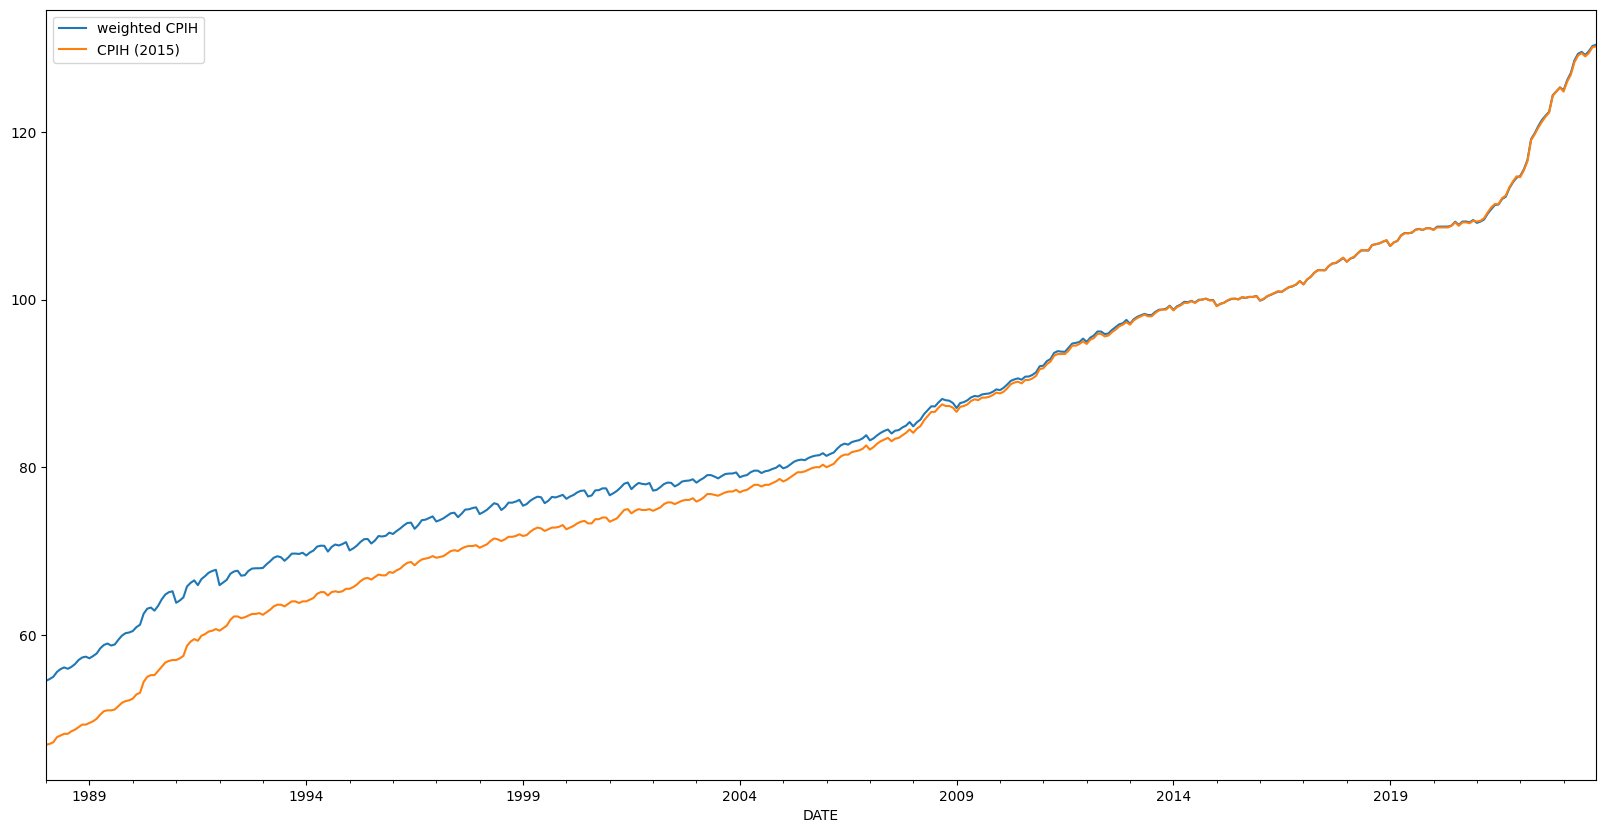

In [320]:
#plot the difference between the two dataframes
diff_df.plot(x='DATE', y=['weighted CPIH', 'CPIH (2015)'], figsize=(20,10))

In [322]:
weights.to_excel('data/weights.xlsx', index=False)

In [323]:
melted_weights = weights.melt(id_vars=['YEAR'], var_name='Category', value_name='Weight')

In [324]:
melted_weights.to_excel('data/melted_weights.xlsx', index=False)

In [336]:
weights[weights['YEAR'] ==  2023].T.to_excel('data/weights_2023.xlsx', index=True, header=False)

In [347]:
#funciton to transform a np array to percentual difference from 12 months ago
def inflation(array):
    cpih = array[12:]
    cpih_12 = array[:-12]
    return (cpih - cpih_12) / cpih_12 * 100

def inflation_from_predictions(original, predictions):
    number_of_months = len(predictions)
    original[-number_of_months:] = predictions
    inf = inflation(original)
    return inf[-number_of_months:]

t = inflation(cpih.iloc[:,1].to_numpy())


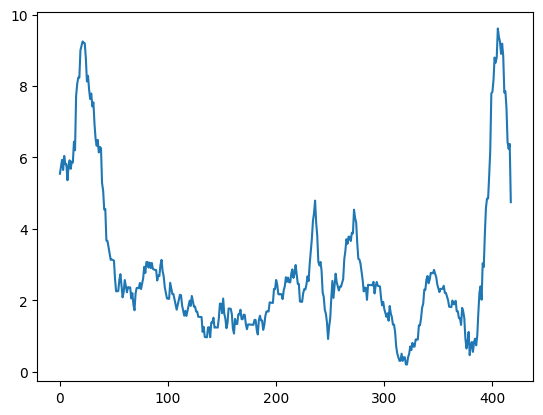

In [348]:
#plot t
import matplotlib.pyplot as plt

plt.plot(t)